# كود اختيار افصل طريقة لتجميع البيانات

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
## بيانات التدريب

In [3]:
data=pd.read_excel('X_train.xlsx')

data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,Tragan,100,23,0.8,3.4,10.0,20,10,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,53,Sabha,190,27,0.6,4.2,9.3,11,17,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,1,50,Sabha,150,15,1.1,3.5,8.5,13,10,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,13,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,15,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,Algatroon,146,28,0.7,4.0,9.5,63,23,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,1,47,Sabha,90,32,0.8,4.7,8.8,82,23,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,1,43,Sabha,70,15,0.6,3.5,8.1,22,15,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,1,60,Sabha,98,29,0.9,4.8,8.2,51,17,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.columns.tolist()
for column in cols:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

##  making model
# 

In [5]:
#scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# 
### 1) making model 

In [6]:
##!pip install kneed

####        1)kmeans

In [7]:
## elbow METHOD

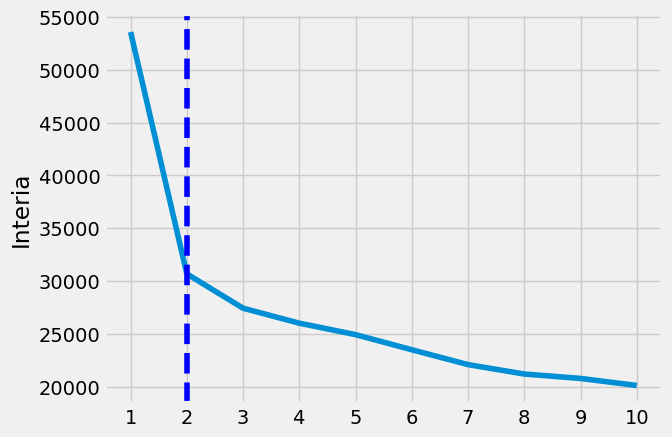

In [8]:
from sklearn.cluster import KMeans

List = []
for k in range(1,11):#this range is optional
    kmeans = KMeans(n_clusters=k, init= "random",max_iter = 300, random_state = 1, n_init = 10) 
    kmeans.fit(scaled_features)
    List.append(kmeans.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show()  

In [9]:
## silhouette_score method

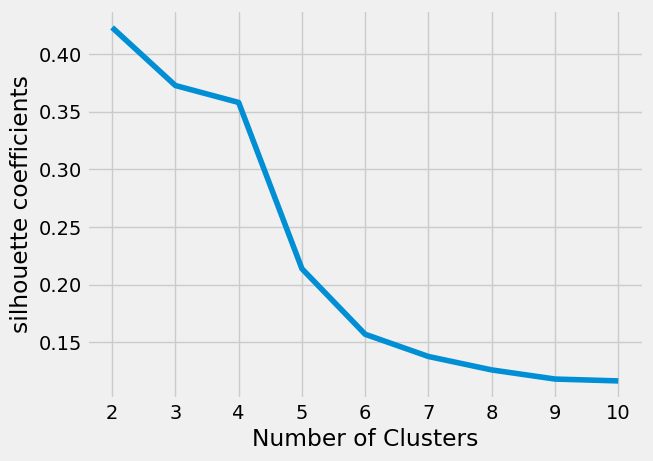

max silhouette score: 0.4229650438689295


In [10]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('max silhouette score:',max(silhouette_coefficients))

In [11]:
## calinski_harabasz_score methode

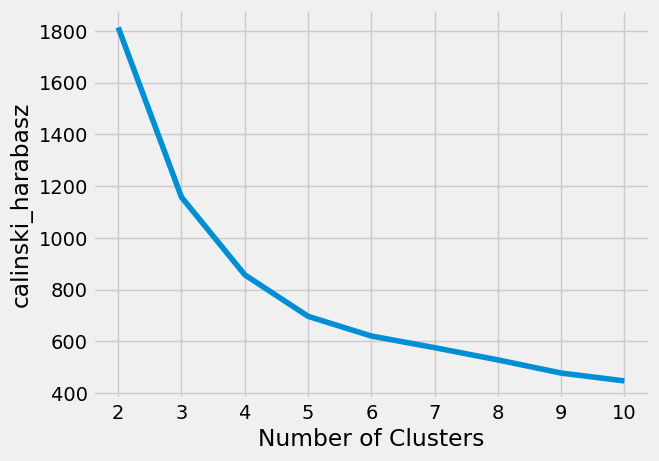

max calinski_harabaz score: 1813.7848264062752


In [12]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, kmeans.labels_))
    

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [13]:
## بعد اتفاق الطرق السابقة ان قيمة  clustring=2
## هده البيانات مصنفه من KMeans

In [14]:
kmeans = KMeans(n_clusters=2, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(scaled_features)
df_cluster_with_kmean= pd.concat([data, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
df_cluster_with_kmean

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,cluster
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,1
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,1
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,1
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,1
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,1


1    1406
0    1029
Name: cluster, dtype: int64


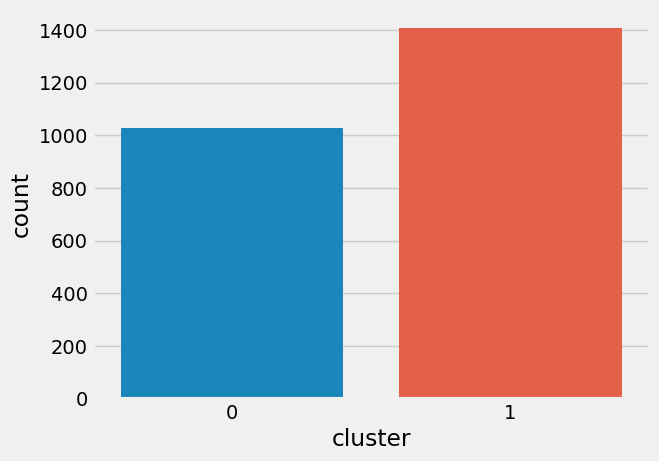

In [15]:
# counting number of clusters
print(df_cluster_with_kmean['cluster'].value_counts())
sns.countplot(x=df_cluster_with_kmean.cluster)
plt.show()

silhouette_score or 2 clusters: 0.4229650438689295
1    1406
0    1029
Name: cluster, dtype: int64


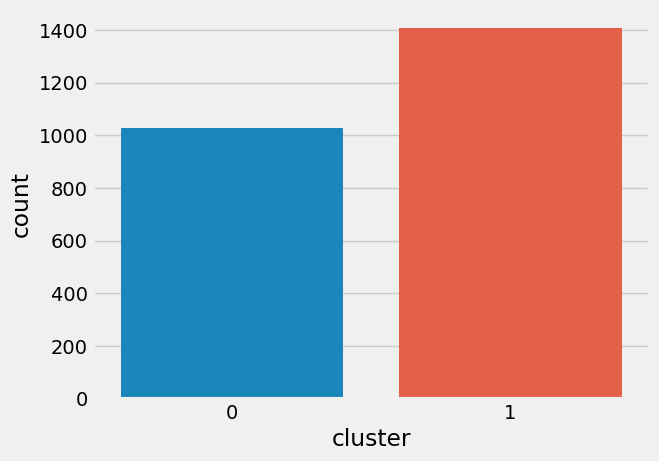

In [16]:
kmeans = KMeans(n_clusters=2, init= "random",max_iter = 300, random_state = 1, n_init = 10).fit(scaled_features)
print('silhouette_score or 2 clusters:',silhouette_score(scaled_features, kmeans.labels_))
df_cluster_with_kmean_without_pca = pd.concat([data, pd.DataFrame({'cluster': kmeans.labels_})], axis = 1)
# counting number of clusters
print(df_cluster_with_kmean_without_pca['cluster'].value_counts())
sns.countplot(x=df_cluster_with_kmean_without_pca.cluster)
plt.show()

# 
#### 2)Gaussian mixture model

In [17]:
## silhouette_score

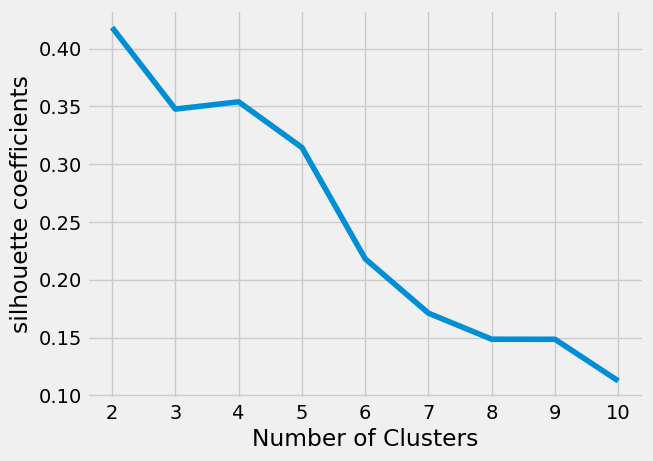

max silhouette score: 0.41839720860702995


In [18]:
from sklearn.mixture import GaussianMixture

sil_gmm = []
for k in range(2,11):#this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component 
    gmm.fit(scaled_features)
    score = silhouette_score(scaled_features, gmm.predict(scaled_features),metric='euclidean',random_state=5)
    sil_gmm.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sil_gmm)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('max silhouette score:',max(sil_gmm))

In [19]:
## calinski_harabasz_score

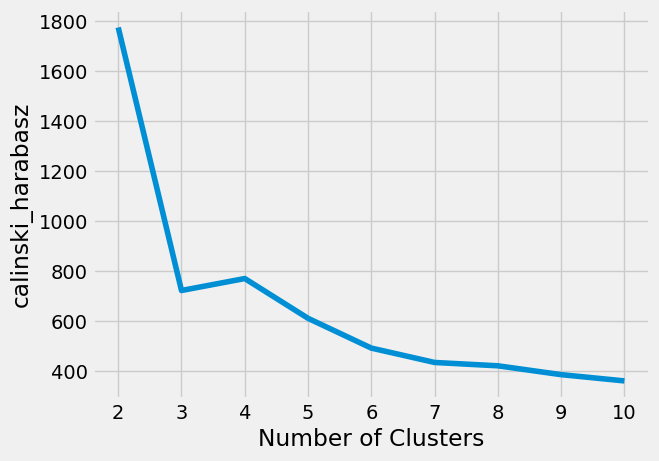

max calinski_harabaz score: 1774.626669091055


In [20]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

calinski_harabaz = []
for k in range (2,11):
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(scaled_features)
    metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features))
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_features, gmm.predict(scaled_features)))
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [21]:
## بعد اتفاق الطرق السابقة ان قيمة  clustring=2
## هده البيانات مصنفه من GaussianMixture

In [22]:
# so 2 cluster is the best
gmm = GaussianMixture(n_components=2, random_state=1 )
gmm.fit(scaled_features)
labels = gmm.predict(scaled_features)
df_cluster_with_gmm = pd.concat([data, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_gmm 

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,cluster
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


0    1351
1    1084
Name: cluster, dtype: int64


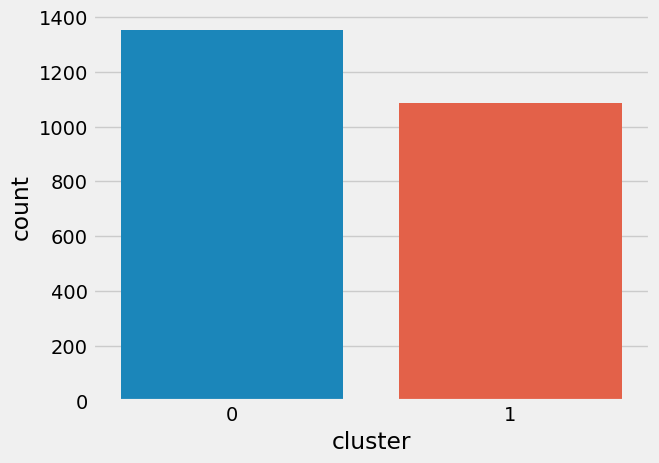

In [23]:
# counting number of clusters
print(df_cluster_with_gmm['cluster'].value_counts())
sns.countplot(x=df_cluster_with_gmm.cluster)
plt.show()

# 
#### 3) Hierarchical Clustering(merging or spiliting clusters)

In [24]:
## silhouette_score

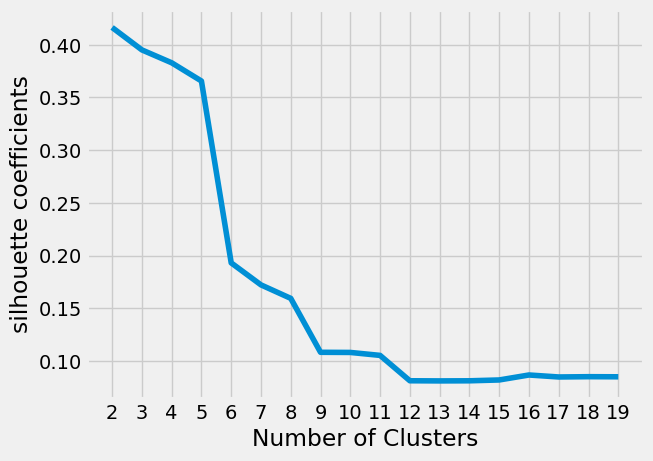

max silhouette score: 0.4164607869218913


In [25]:
from sklearn.cluster import AgglomerativeClustering

sil_Hierarch = []
for k in range(2,20):#this range is optional
    Hierarch = AgglomerativeClustering(n_clusters = k,linkage='ward')#linkage determines which distance to use between sets of observstion.alghorithm minimize this distance 
    score = silhouette_score(scaled_features, Hierarch.fit_predict(scaled_features),metric='euclidean')
    sil_Hierarch.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,20), sil_Hierarch)
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()
print('max silhouette score:',max(sil_Hierarch))

In [26]:
##calinski_harabaz

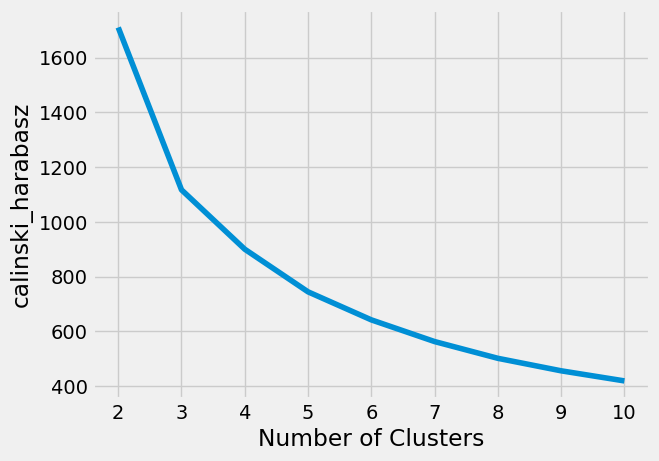

max calinski_harabaz score: 1710.284244953736


In [27]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

calinski_harabaz = []
for k in range (2,11):
    Hierarch = AgglomerativeClustering(n_clusters = k, linkage='ward')
    score = metrics.calinski_harabasz_score(scaled_features, Hierarch.fit_predict(scaled_features))
    calinski_harabaz.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [28]:
## بعد اتفاق الطرق السابقة ان قيمة  clustring=2
## هده البيانات مصنفه من AgglomerativeClustering

In [29]:
# so 2 cluster is the best
Hierarch = AgglomerativeClustering(n_clusters =2,linkage='ward')
Hierarch.fit(scaled_features)
labels = Hierarch.labels_
df_cluster_with_Hierarch= pd.concat([data, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_Hierarch

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,cluster
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,1
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,1
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,1
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,1
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,1


1    1337
0    1098
Name: cluster, dtype: int64


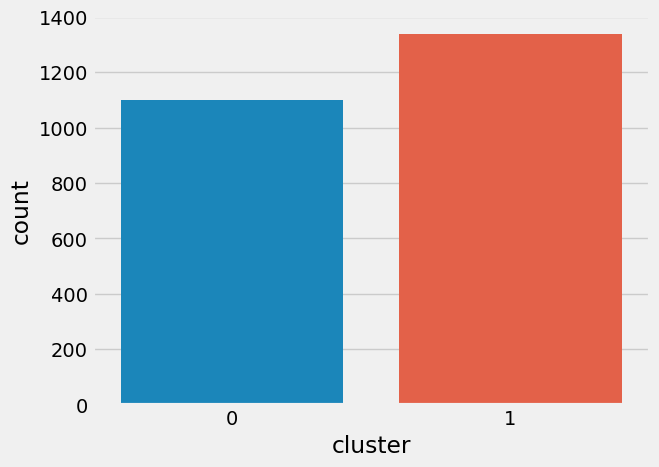

In [30]:
# counting number of clusters
print(df_cluster_with_Hierarch['cluster'].value_counts())
sns.countplot(x=df_cluster_with_Hierarch.cluster)
plt.show()

# 
#### 2-1-5) MiniBatchKMeans
Mini-batch means you only take a subset of all your data during one iteration.The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches to reduce the computation time, while still attempting to optimise the same objective function

In [31]:
##elbow

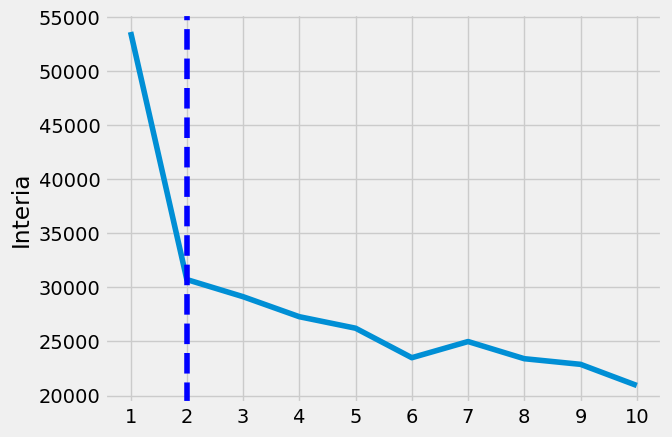

In [32]:
from sklearn.cluster import MiniBatchKMeans

List = []
for k in range(1,11):#this range is optional
    minibatch = MiniBatchKMeans(n_clusters=k , random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    List.append(minibatch.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show() 

In [33]:
##silhouette_coefficients

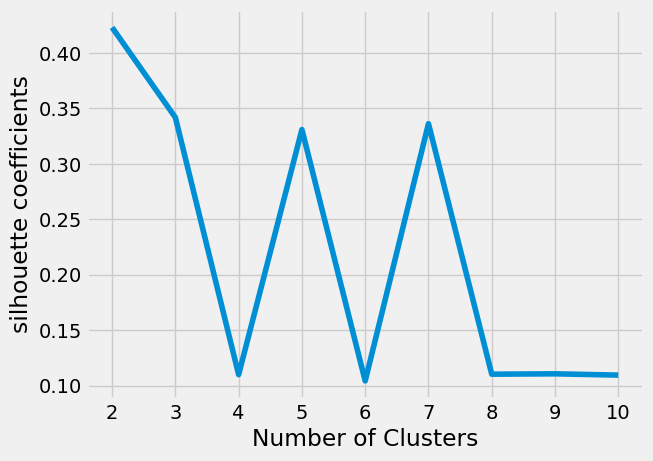

max silhouette score: 0.4229083080291023


In [34]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, random_state =42, batch_size=50) 
    minibatch.fit(scaled_features)
    score = silhouette_score(scaled_features, minibatch.predict(scaled_features))
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()  
print('max silhouette score:',max(silhouette_coefficients))

In [35]:
##calinski_harabaz

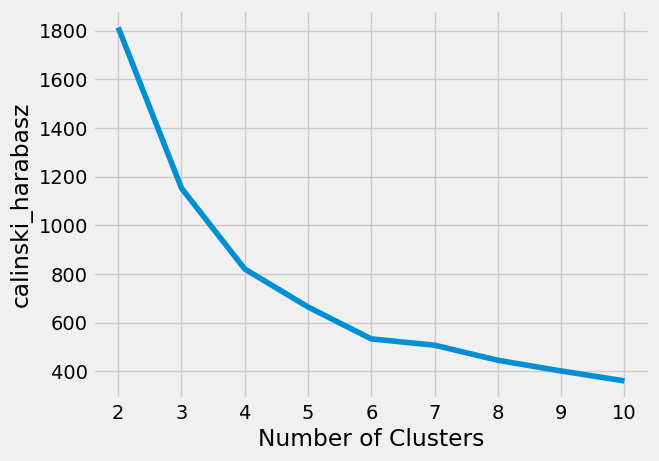

max calinski_harabaz score: 1813.181659111885


In [36]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

calinski_harabaz = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, init='random' , random_state =42, batch_size=50)
    minibatch.fit(scaled_features)
    score = metrics.calinski_harabasz_score(scaled_features, minibatch.labels_)
    calinski_harabaz.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [37]:
## بعد اتفاق الطرق السابقة ان قيمة  clustring=2
## هده البيانات مصنفه من MiniBatchKMeans

In [38]:
#so 2cluster is the best
minibatch = MiniBatchKMeans(n_clusters=2, random_state =42, batch_size=50)
minibatch.fit(scaled_features)
labels = minibatch.labels_
df_cluster_with_minibatch = pd.concat([data, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_minibatch

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,cluster
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


0    1411
1    1024
Name: cluster, dtype: int64


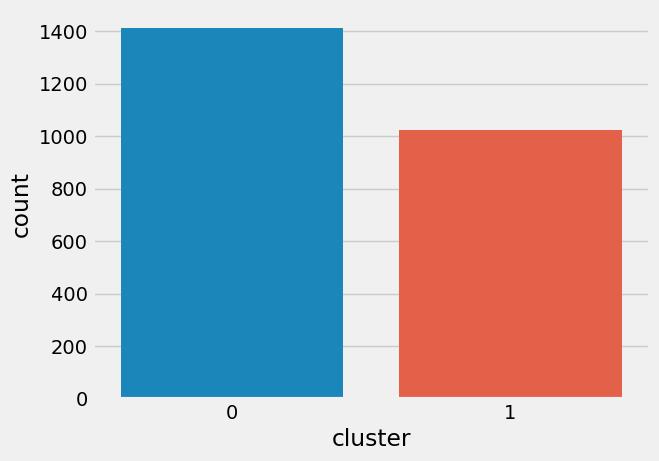

In [39]:
# counting number of clusters
print(df_cluster_with_minibatch['cluster'].value_counts())
sns.countplot(x=df_cluster_with_minibatch.cluster)
plt.show()

# 
#### 2-1-8) DBSCAN

In [40]:
## ضبط معاملتها الفائقة

In [41]:
from sklearn.cluster import DBSCAN

# finding best hyperparameters
min_samples = np.arange(5,20,1)
Eps=[]
Min_samples=[]
num_clusters = []
silhouette_coefficients = []
best_n_clusters = 2
max_sil = 0
for i in  range(2,21):
    for j in  np.arange(0.2,5,0.2):
        model_db = DBSCAN(eps=j, min_samples = i, metric='euclidean')
        model_db.fit(scaled_features)
        labels = model_db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)#cluster (-1), is not exactly part of a cluster. They are simply points that do not belong to any clusters and can be "ignored" to some extent.
        num_clusters.append(n_clusters_)
        Min_samples.append(i)
        Eps.append(j)
        if len(np.unique(labels))==1:
            score = 0
        else:
            score = silhouette_score(scaled_features,  model_db.labels_)
        silhouette_coefficients.append(score)
        if (score > max_sil) and (n_clusters_>=2):
            max_sil = score
            best_n_clusters = n_clusters_ 
            min_sample = i
            ep = j

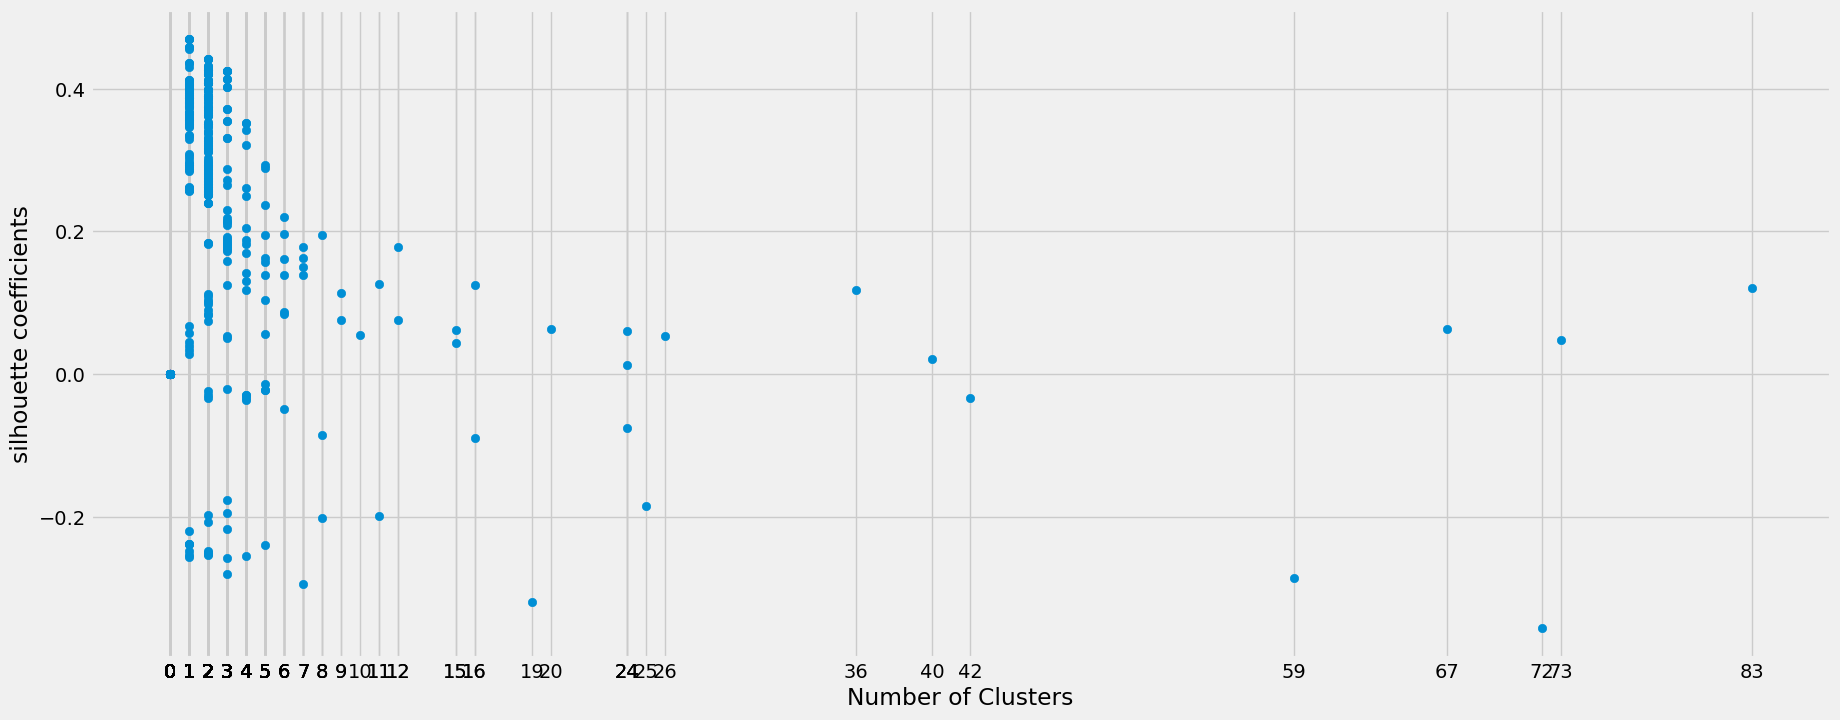

In [42]:

plt.subplots(figsize=(20,8))
plt.style.use("fivethirtyeight")
plt.scatter(num_clusters, silhouette_coefficients)
plt.xticks(num_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 

In [43]:
print("maximum of silhouette:",max_sil)
print('best_n_clusters:',best_n_clusters)
print('min_samples:',min_sample)
print('best eps:',ep)

maximum of silhouette: 0.4411240077657584
best_n_clusters: 2
min_samples: 6
best eps: 4.800000000000001


In [44]:
from sklearn.cluster import DBSCAN
model_db = DBSCAN(eps=ep, min_samples = min_sample, metric='euclidean')
model_db.fit(scaled_features)
labels = model_db.labels_
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [45]:
score = silhouette_score(scaled_features, model_db.labels_)
score

0.4411240077657584

In [46]:
score = metrics.calinski_harabasz_score(scaled_features, model_db.labels_)
score

62.14893597165647

In [47]:
#adding cluster column to dataframe
df_cluster_with_dbscan = pd.concat([data, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_dbscan

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,cluster
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


In [48]:
## -1 معناها لم تتمكن من معرفة العينة هل حميدة او خبيثة

 0    2408
 1      17
-1      10
Name: cluster, dtype: int64


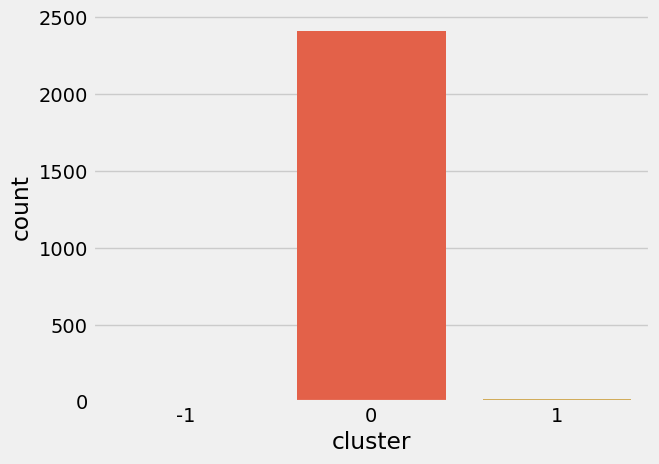

In [49]:
# counting number of clusters
print(df_cluster_with_dbscan['cluster'].value_counts())
sns.countplot(x=df_cluster_with_dbscan.cluster)
plt.show()

# تقييم افضل طريقة clustring
### Comparison Models

In [50]:
df12 = pd.DataFrame({'models':['kmeans',
                               'gaussian mixture',
                               'Agglomerative',
                               'MiniBatchKMeans' ,
                               'dbscan']
                     
                     ,'silhouette_coefficients':[0.422,
                                                 0.418,
                                                 0.416,
                                                 0.422,
                                                 0.441]
                     
                     ,'calinski_harabasz_score':[1813.7,
                                                 1774.6,
                                                 1710.2,
                                                 1813.1,
                                                 62.1]
                     
                     ,'n_clusters':[2,2,2,2,3]})
df12

,models,silhouette_coefficients,calinski_harabasz_score,n_clusters
0,kmeans,0.422,1813.7,2
1,gaussian mixture,0.418,1774.6,2
2,Agglomerative,0.416,1710.2,2
3,MiniBatchKMeans,0.422,1813.1,2
4,dbscan,0.441,62.1,3


Text(0, 0.5, 'scores')

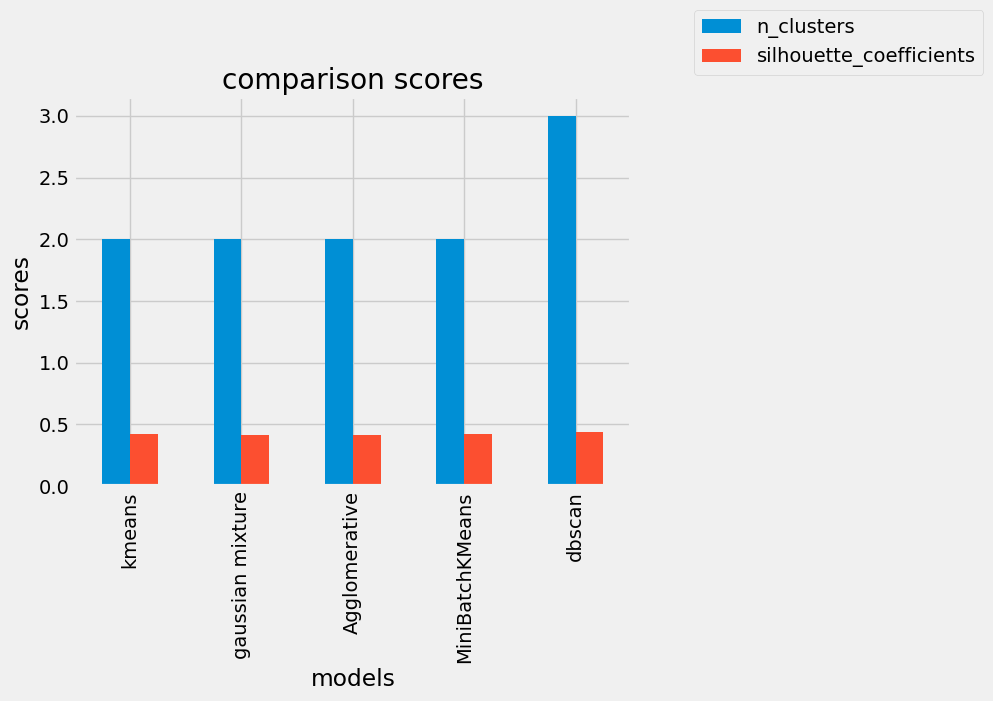

In [51]:


df12.plot( x="models", y=['n_clusters',"silhouette_coefficients"], kind="bar")
plt.legend(bbox_to_anchor =(1.65, 1.25))
plt.title("comparison scores")
plt.xlabel("models")
plt.ylabel("scores")


Text(0, 0.5, 'scores')

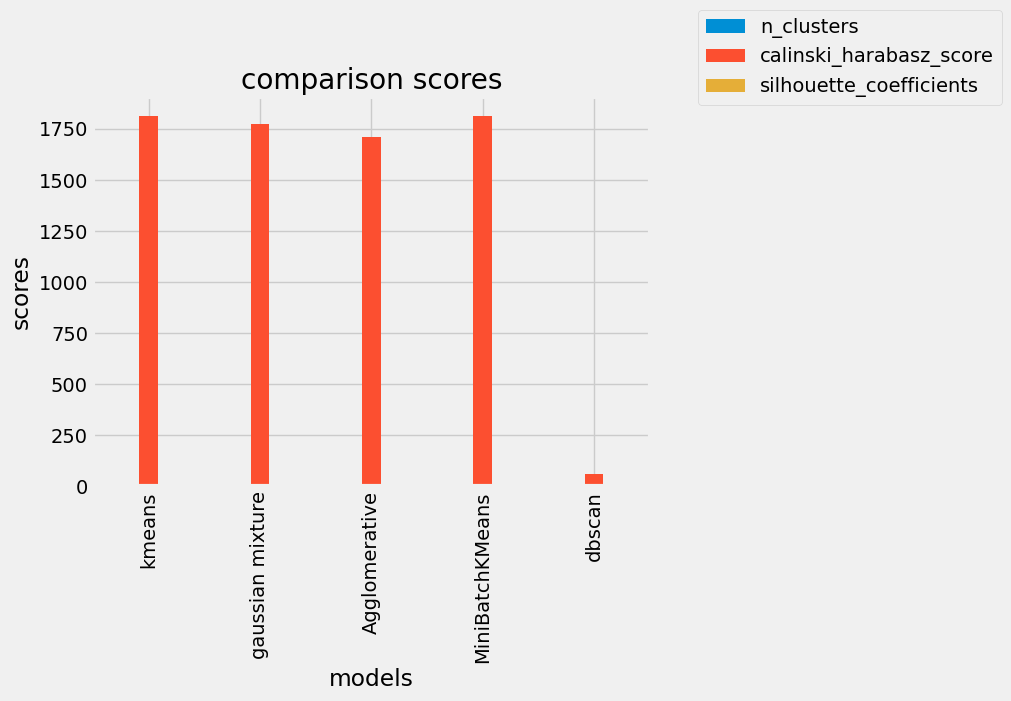

In [52]:



df12.plot( x="models", y=['n_clusters',"calinski_harabasz_score","silhouette_coefficients"], kind="bar")
plt.legend(bbox_to_anchor =(1.65, 1.25))
plt.title("comparison scores")
plt.xlabel("models")
plt.ylabel("scores")
